In [1]:
library('DESeq2')
library('RColorBrewer')
library("pheatmap")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Attaching package: ‘S4Vectors’

The followin

Load and format expression file

In [ ]:
all_exp <- read.csv('../../../Rat-Pilot/atac-data/tag_directories/ml.rlog.txt',sep='\t',
                    col.names=c('PeakID','Chr','Start','End','Strand','Peak.Score','Focus.Ratio.Region.Size','Annotation',
                                'Detailed.Annotation','Distance.to.TSS','Nearest.PromoterID','Entrez.ID','Nearest.Unigene',
                                'Nearest.Refseq','Nearest.Ensembl','Gene.Name','Gene.Alias','Gene.Description','Gene.Type','IL','PL',
                                'ST','AC','AS','VTA'))
all_exp$Annotation <- toupper(all_exp$Annotation)
head(all_exp)

In [2]:
distal_exp <- read.csv('../../../Rat-Pilot/atac-data/tag_directories/all_peaks.distal.rlog.txt',sep='\t',
                       col.names=c('PeakID','Chr','Start','End','Strand','Peak.Score','Focus.Ratio.Region.Size','Annotation',
                                   'Detailed.Annotation','Distance.to.TSS','Nearest.PromoterID','Entrez.ID','Nearest.Unigene',
                                   'Nearest.Refseq','Nearest.Ensembl','Gene.Name','Gene.Alias','Gene.Description','Gene.Type','Core.r1',
                                   'Core.r2','IP.r1','IP.r2','PFC.r1','PFC.r2','PL.r1','PL.r1','Shell.r1','Shell.r2','Striatum.r1',
                                   'Striatum.r2','VTA.r1','VTA.r2'))
head(distal_exp)

PeakID,Chr,Start,End,Strand,Peak.Score,Focus.Ratio.Region.Size,Annotation,Detailed.Annotation,Distance.to.TSS,⋯,PFC.r1,PFC.r2,PL.r1,PL.r1.1,Shell.r1,Shell.r2,Striatum.r1,Striatum.r2,VTA.r1,VTA.r2
<fct>,<fct>,<int>,<int>,<fct>,<dbl>,<lgl>,<fct>,<fct>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Merged-chr2-198589905-9,chr2,198589687,198590119,+,745.3555,NA,Intergenic,Intergenic,-65534,⋯,10.765769,10.435554,11.061045,10.844020,10.237402,10.110829,10.422173,10.161160,10.117088,10.473301
Merged-chr4-77448184-14,chr4,77447678,77448738,+,447.3143,NA,Intergenic,CpG,41327,⋯,10.151998,10.091416,10.280480,10.209139,10.355921,10.374967,10.217871,10.118787,10.111968,10.529637
Merged-chr13-33505050-14,chr13,33504525,33505583,+,398.7000,NA,Intergenic,ISAT_RN|Satellite|Satellite,746596,⋯,9.632409,9.776200,9.627039,9.584468,9.984825,9.668963,9.430331,9.173537,10.730656,10.340115
Merged-chr19-56338619-15,chr19,56338111,56339202,+,290.6933,NA,Intergenic,Intergenic,22212,⋯,9.980468,10.106323,10.284485,10.224314,10.207464,10.241525,9.679577,9.639002,10.797638,10.381749
Merged-chr1-11911002-10,chr1,11910576,11911430,+,175.9000,NA,"intron (NM_001025002, intron 6 of 6).2",CpG,3537,⋯,8.484502,8.590042,8.884085,9.012024,9.093937,8.962666,8.684457,8.939433,8.695265,8.730685
Merged-chr1-180646041-14,chr1,180645500,180646558,+,151.1143,NA,Intergenic,SATI_RN|Satellite|Satellite,-1635772,⋯,8.316101,8.451257,8.234427,8.431929,8.721477,8.396357,8.154674,7.718391,9.255345,8.952389


Subset annotations by region

In [ ]:
promoter <- subset(all_exp,grepl('PROMOTER',all_exp$Annotation))

Format dataframe for heatmap

In [3]:
#Set PeakID as the rownames
#rownames(promoter) <- promoter$PeakID
#promoter$PeakID <- NULL

rownames(distal_exp) <- distal_exp$PeakID
distal_exp$PeakID <- NULL

In [4]:
#Limit dataframe to experiments.
#promoter <- promoter[,c(19:24)]

distal_exp <- distal_exp[,c(19:32)]

In [5]:
#Get sample distances.
#promoterDists <- dist(t(promoter))
#promoterDistsMatrix <- as.matrix(promoterDists)
#colnames(promoterDistsMatrix) <- NULL

distalDists <- dist(t(distal_exp))
distalDistsMatrix <- as.matrix(distalDists)
colnames(distalDistsMatrix) <- NULL

Plot heatmap

In [6]:
colors <- colorRampPalette(rev(brewer.pal(6,"Blues")))(255)

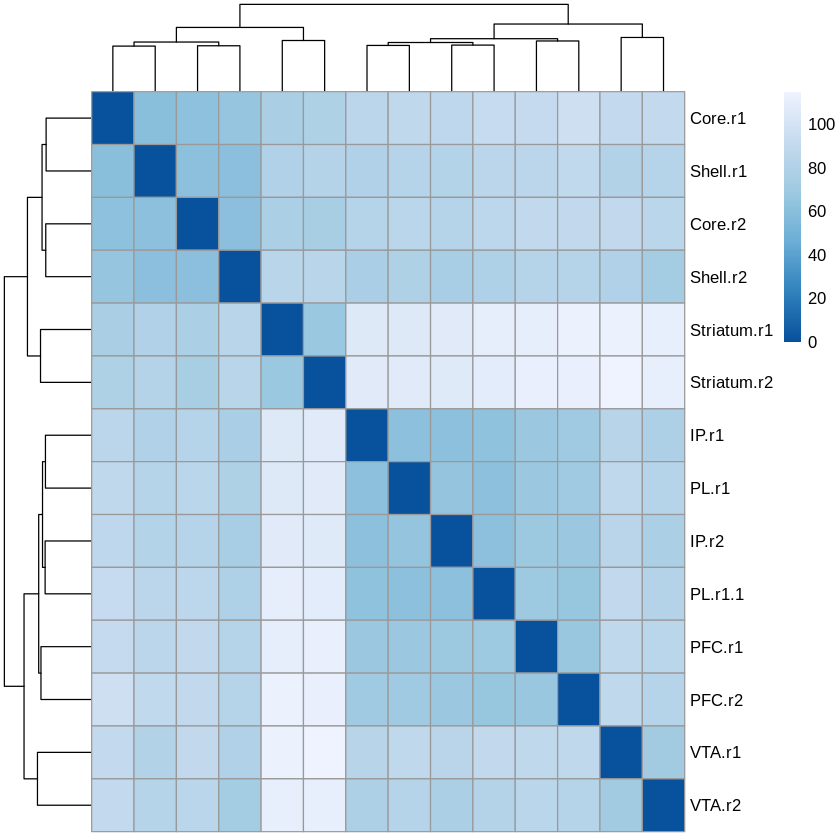

In [7]:
pheatmap(distalDistsMatrix,
         clustering_distance_rows=distalDists,
         clustering_distance_cols=distalDists,
         col=colors)

In [ ]:
pheatmap(promoterDistsMatrix,
         clustering_distance_rows=promoterDists,
         clustering_distance_cols=promoterDists,
         col=colors)